<a href="https://colab.research.google.com/github/shv-om/predictive-analytics-models/blob/main/Shivam_K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/JangirSumit/kmeans-clustering/master/driver-data.csv')
dataset.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [ ]:
# Not important in this dataset because it's already reduced
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pcomponents = pca.fit_transform(dataset)

pdata = pd.DataFrame(data=pcomponents, columns=['p1', 'p2'])

pdata.head()

,p1,p2
0,512.490266,-4.121266
1,-764.530104,-21.527590
2,-1276.516099,-8.813460
3,1074.472943,-20.714970
4,1448.470726,-22.034776


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X = sc.fit_transform(pdata)

X

array([[ 0.44382929, -0.07691876],
       [-0.66210204, -0.40178807],
       [-1.10549462, -0.16449324],
       ...,
       [-0.40996641,  1.77783781],
       [-1.02397095,  1.88093354],
       [ 0.79207282,  1.69027998]])

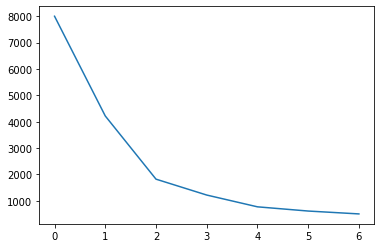

In [ ]:
from sklearn.cluster import KMeans

elbow = []

kmeansmodels = []

for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)

    kmeansmodels.append(kmeans)

    elbow.append(kmeans.inertia_)

plt.plot(elbow)

In [ ]:
print(elbow)

print(kmeansmodels)

[7999.999999999989, 4216.500222735855, 1819.3876270163614, 1216.5618598089181, 769.6693307542882, 609.8958238248618, 500.79743651713943]
[KMeans(n_clusters=1), KMeans(n_clusters=2), KMeans(n_clusters=3), KMeans(n_clusters=4), KMeans(n_clusters=5), KMeans(n_clusters=6), KMeans(n_clusters=7)]


In [ ]:
optimal_model = kmeansmodels[1]
optimal_model

KMeans(n_clusters=2)

In [ ]:
y_kmeans = optimal_model.predict(X)
y_kmeans

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
X[y_kmeans == 0, 1]

array([-0.07691876, -0.40178807, -0.16449324, ..., -0.52684138,
       -0.69536081, -0.47024987])

Text(0.5, 1.0, 'K-Means Clustering')

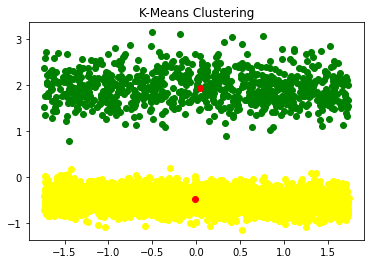

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color='yellow', label='Cluster_1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color='green', label='Cluster_2')
plt.scatter(optimal_model.cluster_centers_[:, 0], optimal_model.cluster_centers_[:, 1], color='red', label='Centroid')

plt.title("K-Means Clustering")